In [1]:
import glob
import pandas as pd

frame = pd.DataFrame()
list_ = []
path =r'/home/shashank/Documents/location/Geolife Trajectories 1.3/Data' # use your path

for x in range(0, 16):
    k = "{0:0=3d}".format(x)
    allFiles = glob.glob(path + "/" + k + "/Trajectory/*.plt")
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, skiprows=6, header = None)
        df['UserName'] = k
        list_.append(df)

frame = pd.concat(list_)
frame.tail()


,0,1,2,3,4,5,6,UserName
212,39.974123,116.332328,0,102.0,39748.408183,2008-10-27,09:47:47,015
213,39.974147,116.332461,0,108.0,39748.408241,2008-10-27,09:47:52,015
214,39.974024,116.332578,0,112.0,39748.408299,2008-10-27,09:47:57,015
215,39.973959,116.332726,0,103.0,39748.408356,2008-10-27,09:48:02,015
216,39.973948,116.332813,0,101.0,39748.408414,2008-10-27,09:48:07,015


In [2]:
frame.columns = ['Latitude', 'Longitude', '0', 'Altitude', 'NumDays', 'Date', 'Time', 'Username']
frame.tail()

,Latitude,Longitude,0,Altitude,NumDays,Date,Time,Username
212,39.974123,116.332328,0,102.0,39748.408183,2008-10-27,09:47:47,015
213,39.974147,116.332461,0,108.0,39748.408241,2008-10-27,09:47:52,015
214,39.974024,116.332578,0,112.0,39748.408299,2008-10-27,09:47:57,015
215,39.973959,116.332726,0,103.0,39748.408356,2008-10-27,09:48:02,015
216,39.973948,116.332813,0,101.0,39748.408414,2008-10-27,09:48:07,015


In [3]:
frame["Timestamp"] = frame["Date"].map(str) + " " + frame["Time"]
frame.Timestamp = pd.to_datetime(frame.Timestamp)
frame.dtypes

Latitude            float64
Longitude           float64
0                     int64
Altitude            float64
NumDays             float64
Date                 object
Time                 object
Username             object
Timestamp    datetime64[ns]
dtype: object

In [4]:
frame.index = pd.to_datetime(frame.Timestamp)

In [5]:
frame.tail()

,Latitude,Longitude,0,Altitude,NumDays,Date,Time,Username,Timestamp
Timestamp,,,,,,,,,
2008-10-27 09:47:47,39.974123,116.332328,0,102.0,39748.408183,2008-10-27,09:47:47,015,2008-10-27 09:47:47
2008-10-27 09:47:52,39.974147,116.332461,0,108.0,39748.408241,2008-10-27,09:47:52,015,2008-10-27 09:47:52
2008-10-27 09:47:57,39.974024,116.332578,0,112.0,39748.408299,2008-10-27,09:47:57,015,2008-10-27 09:47:57
2008-10-27 09:48:02,39.973959,116.332726,0,103.0,39748.408356,2008-10-27,09:48:02,015,2008-10-27 09:48:02
2008-10-27 09:48:07,39.973948,116.332813,0,101.0,39748.408414,2008-10-27,09:48:07,015,2008-10-27 09:48:07


In [6]:

frame['Weekday'] = frame['Timestamp'].dt.weekday.map(str) + frame['Timestamp'].dt.weekday_name
frame = frame.sort_values(by=['Username', 'Weekday'])
frame


,Latitude,Longitude,0,Altitude,NumDays,Date,Time,Username,Timestamp,Weekday
Timestamp,,,,,,,,,,
2009-05-25 09:36:47,40.005504,116.320902,0,492.0,39958.400544,2009-05-25,09:36:47,000,2009-05-25 09:36:47,0Monday
2009-05-25 09:36:52,40.005545,116.320827,0,492.0,39958.400602,2009-05-25,09:36:52,000,2009-05-25 09:36:52,0Monday
2009-05-25 09:36:57,40.005506,116.320835,0,493.0,39958.400660,2009-05-25,09:36:57,000,2009-05-25 09:36:57,0Monday
2009-05-25 09:37:01,40.005349,116.320945,0,493.0,39958.400706,2009-05-25,09:37:01,000,2009-05-25 09:37:01,0Monday
2009-05-25 09:37:06,40.007845,116.319570,0,61.0,39958.400764,2009-05-25,09:37:06,000,2009-05-25 09:37:06,0Monday
2009-05-25 09:37:11,40.007818,116.319608,0,67.0,39958.400822,2009-05-25,09:37:11,000,2009-05-25 09:37:11,0Monday
2009-05-25 09:37:16,40.007805,116.319633,0,66.0,39958.400880,2009-05-25,09:37:16,000,2009-05-25 09:37:16,0Monday
2009-05-25 09:37:17,40.007784,116.319653,0,73.0,39958.400891,2009-05-25,09:37:17,000,2009-05-25 09:37:17,0Monday
2009-05-25 09:37:22,40.007752,116.319687,0,76.0,39958.400949,2009-05-25,09:37:22,000,2009-05-25 09:37:22,0Monday


In [8]:
import numpy as np
import seaborn as sns

#weeklydf = frame[['Username', 'Weekday', 'Latitude']].groupby(['Username', 'Weekday'])['Latitude'].agg('count')
weeklydf = frame.pivot_table(values='Latitude', index='Username',columns='Weekday',aggfunc=len)
weeklydf
#bc['DAY_OF_WEEK'] = pd.Categorical(bc['DAY_OF_WEEK'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)


Weekday,0Monday,1Tuesday,2Wednesday,3Thursday,4Friday,5Saturday,6Sunday
Username,,,,,,,
000,19608.0,24148.0,15070.0,26835.0,27528.0,30351.0,30330.0
001,10555.0,14077.0,14849.0,10198.0,11667.0,30376.0,16885.0
002,25841.0,28301.0,28199.0,33657.0,30891.0,57103.0,44225.0
003,58713.0,69541.0,56756.0,64411.0,83037.0,79723.0,73045.0
004,49590.0,54835.0,57480.0,65973.0,66348.0,73945.0,71226.0
005,10335.0,18211.0,18858.0,11563.0,19532.0,18737.0,11810.0
006,394.0,156.0,4341.0,5696.0,5758.0,7172.0,8313.0
007,5442.0,13969.0,12596.0,10574.0,14465.0,15349.0,14822.0
008,6884.0,8421.0,23633.0,7468.0,9721.0,16597.0,5186.0


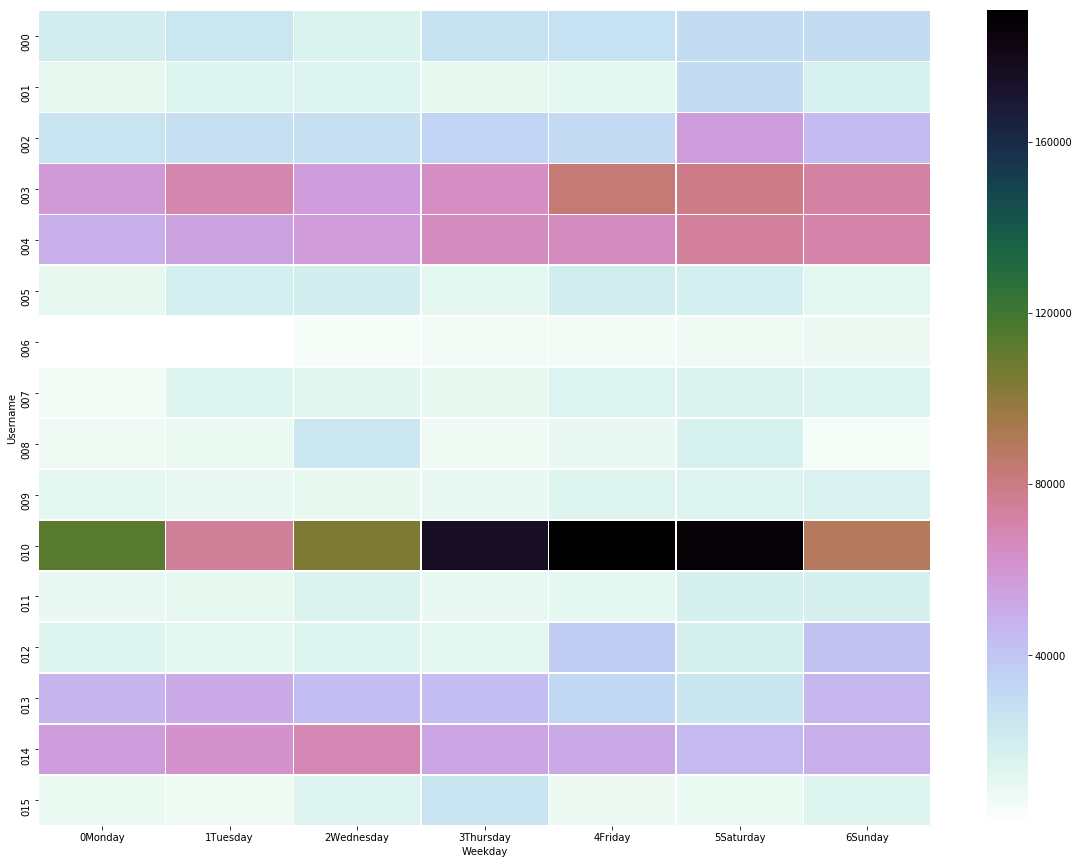

In [11]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

colormap = pyplot.cm.cubehelix_r
fig, ax = plt.subplots(figsize=(20,15))  
sns.heatmap(weeklydf, cmap=colormap, linewidths=.5, ax=ax)
#sns.heatmap(weeklydf, cmap="YlGnBu", linewidths=.5, ax=ax)

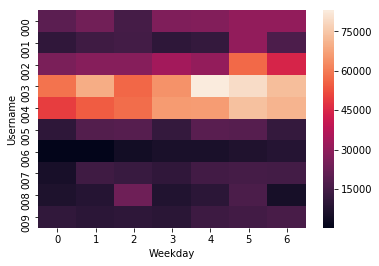

In [63]:
sns.heatmap(weeklydf1)